In [1]:
import cptac
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics
import parse_correlations_dataframe as get_corr
import copy

cptac warning: Your version of cptac (0.8.5) is out-of-date. Latest is 0.8.6. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-147bbc873c03>, line 1)


In [2]:
def find_mutated_genes (cancer_type, min_patients = 10):
    mt = cancer_type.get_somatic_mutation()
    mt_genes = mt.groupby(by="Gene")
    genes = []
    for gene, patients in mt_genes:
        if len(patients) >= min_patients:
            genes.append(gene)
    return genes
    
    
    

In [22]:
def find_mutation_corr_effect(cancer_type, gene):
    gene_multi = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene, 'somatic_mutation': gene}, tissue_type = 'tumor')
    if gene_multi[str(gene +"_transcriptomics")].isnull().values.any() or gene_multi[str(gene + '_proteomics')].isnull().values.any():
        return float("NaN"), float("NaN"), float("NaN")
    
    trans = list(gene_multi[str(gene +"_transcriptomics")])
    prot = list(gene_multi[str(gene + '_proteomics')])
    group = []
    for i in gene_multi[str(gene + '_Mutation_Status')]:
        if type(i) == str:
            group.append("mutation")
        else:
            group.append("wt")
            
    gene_df = pd.DataFrame({'Type': group, 'Proteomics': prot, 'Transcriptomics': trans})
    is_mut = gene_df['Type'] == 'mutation'
    is_wt = gene_df['Type'] == 'wt'
    gene_cor, gen_pval = scipy.stats.pearsonr(gene_df[is_mut]['Proteomics'], gene_df[is_mut]['Transcriptomics'])
    wt_cor, wt_pval = scipy.stats.pearsonr(gene_df[is_wt]['Proteomics'], gene_df[is_wt]['Transcriptomics'])
    gene_m, gene_b, gene_r, gene_p, gene_se = stats.linregress(gene_df[is_mut]['Proteomics'], gene_df[is_mut]['Transcriptomics'])
    wt_m, wt_b, wt_r, wt_p, wt_se = stats.linregress(gene_df[is_wt]['Proteomics'], gene_df[is_wt]['Transcriptomics'])
    gene_r2 = gene_r ** 2
    wt_r2 = wt_r ** 2
    r2_delta = gene_r2 - wt_r2
    corr_dif = gene_cor - wt_cor
    return corr_dif, r2_delta, gene_df
    

In [4]:
cptac.download("endometrial")
en = cptac.Endometrial()

In [5]:
genes = find_mutated_genes(en)

In [24]:
corr_diffs = []
r2_deltas = []
filtered_genes = []
gene_dfs = []
for gene in genes:
    cor, r2, gene_df = find_mutation_corr_effect(en, gene)
    if not np.isnan(cor):
        corr_diffs.append(cor)
        r2_deltas.append(r2)
        filtered_genes.append(gene)
        gene_dfs.append(gene_df)
en_mutation_effects = pd.DataFrame({'gene': filtered_genes, 'correlation_difference': corr_diffs, "r2_delta" : r2_deltas, "gene_dataframes": gene_dfs})


cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA12 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA13 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA5 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCA6 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ABCB4 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were n

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CACNA1C (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CACNA1D (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CACNA1E (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CACNA1F (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: CACNA1H (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following column

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: DGKI (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: DISP1 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: DLGAP2 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: DNAH10 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: DNAH11 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were n

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FER1L6 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FHOD3 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FLG (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FLG2 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: FMN2 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not fo

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: KIAA2026 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: KIF4B (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: KIT (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: KLHL34 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: L1TD1 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were n

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: NCAM2 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: NDST4 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: NEB (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: NLRC3 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: NLRP1 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not f

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: PKHD1 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: PLXNB3 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: POLQ (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: PPEF1 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: PPP1R3A (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were n

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: SLITRK1 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: SLITRK3 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: SLITRK5 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: SOBP (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: SOGA3 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns wer

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: VWA3B (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: WDR49 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: WDR87 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: WNK3 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: WNK4 (<ipython-input-22-b7e34fe7b4df>, line 2)
cptac warning: The following columns were not f

cptac warning: The following columns were not found in the proteomics dataframe, so they were inserted into joined table, but filled with NaN: ZNF99 (<ipython-input-22-b7e34fe7b4df>, line 2)


In [25]:
en_mutation_effects.head()

,gene,correlation_difference,r2_delta,gene_dataframes
0,ABCB1,-0.248630,-0.283049,Type Proteomics Transcriptomics 0 wt ...
1,ABI3BP,-0.097875,-0.122703,Type Proteomics Transcriptomics 0 wt ...
2,ADD3,-0.059687,-0.090649,Type Proteomics Transcriptomics 0 ...
3,AHNAK,0.070727,0.126240,Type Proteomics Transcriptomics 0 wt ...
4,AHNAK2,0.093237,0.155454,Type Proteomics Transcriptomics 0 ...


In [32]:
en_mutation_effects=en_mutation_effects.sort_values(by='correlation_difference')

In [33]:
most_affected_genes = list(en_mutation_effects['correlation_difference'][0:4])
most_affected_genes.append(list(en_mutation_effects['correlation_difference'][-5:]))
print(most_affected_genes)

[-1.3344143936960622, -1.1702950078948477, -1.147348396454468, -1.100208714017844, [0.5308456843881129, 0.544458000745479, 0.5520101486608533, 0.5691648167902204, 0.706767846192286]]


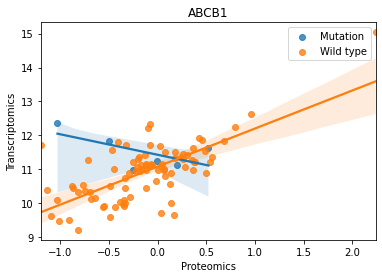

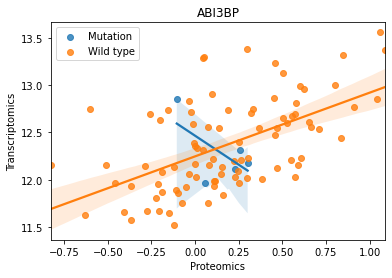

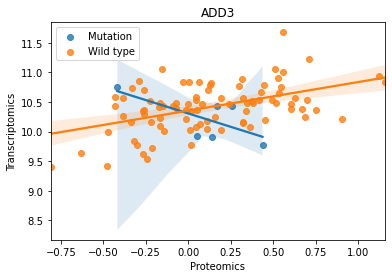

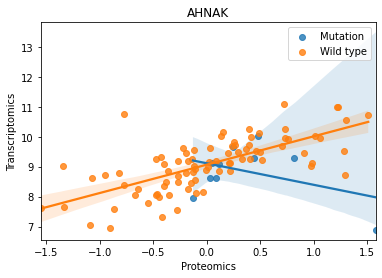

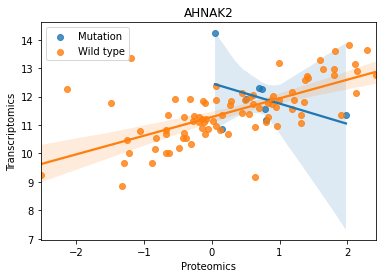

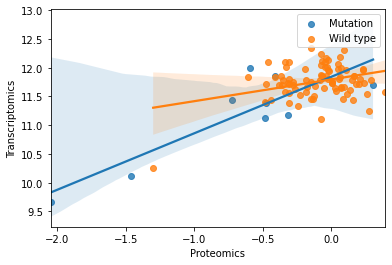

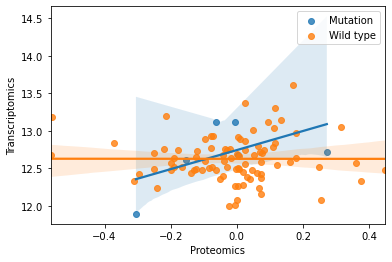

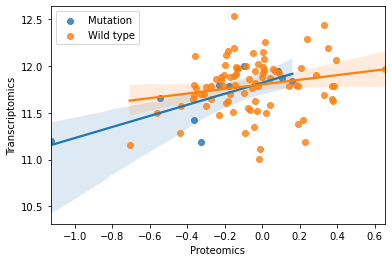

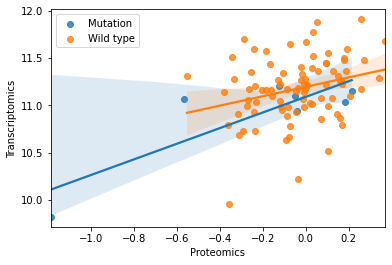

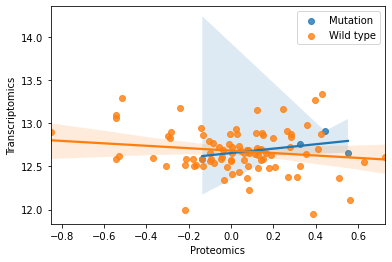

In [36]:
for index, df in enumerate(en_mutation_effects['gene_dataframes'][0:5]):
    is_mt = df['Type'] =='mutation'
    is_wt = df['Type'] == 'wt'
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_mt], label = "Mutation")
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_wt], label = "Wild type")
    ax.legend(loc="best")
    plt.title(en_mutation_effects['gene'][index])
    plt.show()
for index, df in enumerate(en_mutation_effects['gene_dataframes'][-5:]):
    is_mt = df['Type'] =='mutation'
    is_wt = df['Type'] == 'wt'
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_mt], label = "Mutation")
    ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = df[is_wt], label = "Wild type")
    ax.legend(loc="best")
    #plt.title(en_mutation_effects['gene'][-index])
    plt.show()